# Movie Theatre

AOC Day 9 Part 1

In [39]:
input = [
    "7,1",
    "11,1",
    "11,7",
    "9,7",
    "9,5",
    "2,5",
    "2,3",
    "7,3"
]

coordinates = [
    (int(inp.split(",")[0]), int(inp.split(",")[1])) for inp in input
]

coordinates

[(7, 1), (11, 1), (11, 7), (9, 7), (9, 5), (2, 5), (2, 3), (7, 3)]

![img](./img.png)

In [40]:
max_area = 0

for I in range(len(coordinates) - 1):
    for J in range(1, len(coordinates)):
        iy, ix = coordinates[I]
        jy, jx = coordinates[J]
        if ix == jx:
            # consider the unit length of a row.
            max_area = max(abs(iy - jy + 1), max_area)
        elif iy == jy:
            # consider the unit length of a column.
            max_area = max(abs(ix - iy + 1), max_area)
        else:
            max_area = max(abs(ix - jx + 1) * abs(iy - jy + 1), max_area)

print(max_area)

50


$50$ is the answer!

Let's try it for `input.txt`.

In [41]:
with open(file="input.txt") as file:
    input = [line.rstrip() for line in file]

    coordinates = [
        (int(inp.split(",")[0]), int(inp.split(",")[1])) for inp in input
    ]       

    max_area = 0

    for I in range(len(coordinates) - 1):
        for J in range(1, len(coordinates)):
            iy, ix = coordinates[I]
            jy, jx = coordinates[J]
            if ix == jx:
                # consider the unit length of a row.
                max_area = max(abs(iy - jy + 1), max_area)
            elif iy == jy:
                # consider the unit length of a column.
                max_area = max(abs(ix - iy + 1), max_area)
            else:
                max_area = max(abs(ix - jx + 1) * abs(iy - jy + 1), max_area)

    print(max_area)

4781235324


$4781235324$ is the correct answer! 

That was super easy, so Part 2 must be the real deal.

---

### Part II

Let us take in our `Matrix` implementation here.

In [42]:
class Matrix:
    def __init__(self, rows: list[list[str]]) -> None:
        self.current_idx = -1
        self.last_idx = len(rows)
        self._vec: list[list] = []
        self._prepare_matrix(rows)

    def __iter__(self):
        return self
    
    def __next__(self):
        self.current_idx += 1
        if self.current_idx < self.last_idx:
            return self._vec[self.current_idx]

    def _prepare_matrix(self, rows: list[list[str]]) -> None:
        self._vec = [line for line in rows]

    def __getitem__(self, key: tuple[int, int]):
        """
        key: (row, column)
        """
        (row, col) = key
        return self._vec[row][col]

    def __setitem__(self, key: tuple[int, int], value: str):
        """
        key: (row, column)
        """
        (row, col) = key
        self._vec[row][col] = value

    def __len__(self):
        return len(self._vec)

    def row(self, idx: int) -> list[str]:
        return self._vec[idx]
    
    def column(self, idx: int) -> list[str]:
        return [
            self._vec[i][idx] for i in range(len(self._vec))
        ]

    def num_rows(self) -> int:
        return len(self._vec)
    
    def num_cols(self) -> int:
        return len(self._vec[0])
    
    def to_string(self) -> str:
        return str(self._vec)
    
    def pretty_print(self) -> None:
        for row in self._vec:
            print("".join(row))
    
    def dim(self) -> tuple[int, int]:
        return (self.num_rows(), self.num_cols())
    
    def area(self) -> int:
        return self.dim()[0] * self.dim()[1]
    
    def unique_chars(self) -> set[str]:
        s = set()
        for r in range(self.dim()[0]):
            s.update(self.row(r))
        return s
    
    def save(self, filename: str):
        """
        Save the matrix to a file, one row per line.
        Each row is joined into a string.
        """
        with open(filename, 'w') as f:
            for row in self._vec:
                f.write(''.join(row) + '\n')

Let's first aim to arrive at the following matrix.

```
..............
.......#XXX#..
.......X...X..
..#XXXX#...X..
..X........X..
..#XXXXXX#.X..
.........X.X..
.........#X#..
..............
```

In [43]:
input = [
    "7,1",
    "11,1",
    "11,7",
    "9,7",
    "9,5",
    "2,5",
    "2,3",
    "7,3"
]

coordinates = [
    (int(inp.split(",")[0]), int(inp.split(",")[1])) for inp in input
]

# Assume a 15 x 10 grid.
rows = [["."] * 15 for _ in range(10)]

matrix = Matrix(rows=rows)
matrix.pretty_print()

...............
...............
...............
...............
...............
...............
...............
...............
...............
...............


In [44]:
for y, x in coordinates:
    matrix[x, y] = "#"

matrix.pretty_print()

...............
.......#...#...
...............
..#....#.......
...............
..#......#.....
...............
.........#.#...
...............
...............


First, let us check rows.

In [45]:
input = [
    "7,1",
    "11,1",
    "11,7",
    "9,7",
    "9,5",
    "2,5",
    "2,3",
    "7,3"
]

coordinates = [
    (int(inp.split(",")[0]), int(inp.split(",")[1])) for inp in input
]

In [46]:
from collections import defaultdict

coordinate_dict = defaultdict(list)

for I in range(len(coordinates) - 1):
    for J in range(1, len(coordinates)):
        iy, ix = coordinates[I]
        jy, jx = coordinates[J]
        # Same row 
        if ix == jx:
            # consider the unit length of a row.
            # We need to fill the distance with "X"s.
            d = abs(iy - jy) + 1
            s = min(iy, jy)
            for i in range(1, d - 1):
                matrix[ix, s + i] = "X"
                coordinate_dict["green"].append((s + i, ix))
        # Same column
        elif iy == jy:
            # consider the unit length of a column.
            d = abs(ix - jx) + 1
            s = min(ix, jx)
            for i in range(1, d - 1):
                matrix[s + i, iy] = "X"
                coordinate_dict["green"].append((iy, s + i))
        else:
            continue

full_coordinates = coordinate_dict["red"] + coordinate_dict["green"]

for I in range(len(full_coordinates) - 1):
    for J in range(1, len(full_coordinates)):
        iy, ix = full_coordinates[I]
        jy, jx = full_coordinates[J]
        # Same row 
        if ix == jx:
            # consider the unit length of a row.
            # We need to fill the distance with "X"s.
            d = abs(iy - jy) + 1
            s = min(iy, jy)
            for i in range(1, d - 1):
                if matrix[ix, s + i] != "#":
                    matrix[ix, s + i] = "X"
        # Same column
        elif iy == jy:
            # consider the unit length of a column.
            d = abs(ix - jx) + 1
            s = min(ix, jx)
            for i in range(1, d - 1):
                if matrix[s + i, iy] != "#":
                    matrix[s + i, iy] = "X"
        else:
            continue

matrix.pretty_print()

...............
.......#XXX#...
.......XXXXX...
..#XXXX#XXXX...
..XXXXXXXXXX...
..#XXXXXX#XX...
.........XXX...
.........#X#...
...............
...............


In addition, all of the tiles inside this loop of red and green tiles need also to be green. That is, it needs to be like the following:

```
..............
.......#XXX#..
.......XXXXX..
..#XXXX#XXXX..
..XXXXXXXXXX..
..#XXXXXX#XX..
.........XXX..
.........#X#..
..............
```

Looks like we are good. We have a big time and space complexity problem but let's try to go ahead with what we have now.

In [47]:
max_area = 0

for I in range(len(coordinates) - 1):
    for J in range(1, len(coordinates)):
        iy, ix = coordinates[I]
        jy, jx = coordinates[J]
        if ix == jx:
            # consider the unit length of a row.
            max_area = max(abs(iy - jy + 1), max_area)
        elif iy == jy:
            # consider the unit length of a column.
            max_area = max(abs(ix - iy + 1), max_area)
        else:
            max_area = max(abs(ix - jx + 1) * abs(iy - jy + 1), max_area)

max_area

50

Given _diagonal_ coordinates $(x_1, y_1)$ and $(x_2, y_2)$, what are the unique characters within the rectangle $R$ created as the given coordinates as the diagonal?

We will write a utility function for calculating this.

In [48]:
class UniqueCharacters:
    @staticmethod
    def of(matrix: Matrix, I: tuple[int, int], J: tuple[int, int]):
        pass

The function signature above is for a static utility class `UniqueCharacters` that specifies an `of` function that takes in the two coordinates (i.e., $(x_1, y_1)$ and $(x_2, y_2)$), and an instance of `Matrix`, and returns unique characters inside the rectangle $R$ created with the coordinate points $X$ and $Y$.

Note that here, $x_i$ would denote the rows, and $y_i$ would denote the columns.

In [49]:
class SubMatrixUtility:
    @staticmethod
    def of(matrix: Matrix, I: tuple[int, int], J: tuple[int, int]):
        # Destructure the coordinates into (x1, y1) and (x2, y2)
        x1, y1 = I
        x2, y2 = J

        # What is the starting point of the rectangle, in X and Y directions.
        start_x, end_x = min(x1, x2), max(x1, x2)
        start_y, end_y = min(y1, y2), max(y1, y2)

        sub = []

        for row in range(start_x, end_x + 1):
            crow = []
            for col in range(start_y, end_y + 1):
                crow.append(matrix._vec[row][col])
            sub.append(crow)

        return Matrix(rows=sub)

We aren't done yet. We'll test it out thus far.

In [50]:
matrix.pretty_print()

...............
.......#XXX#...
.......XXXXX...
..#XXXX#XXXX...
..XXXXXXXXXX...
..#XXXXXX#XX...
.........XXX...
.........#X#...
...............
...............


In [51]:
rectangle = SubMatrixUtility.of(matrix, (1,7), (2, 11))
rectangle.pretty_print()

#XXX#
XXXXX


In [52]:
rectangle.unique_chars()

{'#', 'X'}

In [53]:
rectangle = SubMatrixUtility.of(matrix, (5,9), (3, 2))
rectangle.pretty_print()

#XXXX#XX
XXXXXXXX
#XXXXXX#


In [54]:
from collections import defaultdict

def prepare(coordinates, nrows, ncols) -> Matrix:

    # Assume a 15 x 10 grid.
    rows = [["."] * nrows for _ in range(ncols)]

    matrix = Matrix(rows=rows)

    for y, x in coordinates:
        matrix[x, y] = "#"

    coordinate_dict = defaultdict(list)

    for I in range(len(coordinates) - 1):
        for J in range(1, len(coordinates)):
            iy, ix = coordinates[I]
            jy, jx = coordinates[J]
            # Same row 
            if ix == jx:
                # consider the unit length of a row.
                # We need to fill the distance with "X"s.
                d = abs(iy - jy) + 1
                s = min(iy, jy)
                for i in range(1, d - 1):
                    matrix[ix, s + i] = "X"
                    coordinate_dict["green"].append((s + i, ix))
            # Same column
            elif iy == jy:
                # consider the unit length of a column.
                d = abs(ix - jx) + 1
                s = min(ix, jx)
                for i in range(1, d - 1):
                    matrix[s + i, iy] = "X"
                    coordinate_dict["green"].append((iy, s + i))
            else:
                continue

    full_coordinates = coordinate_dict["red"] + coordinate_dict["green"]

    for I in range(len(full_coordinates) - 1):
        for J in range(1, len(full_coordinates)):
            iy, ix = full_coordinates[I]
            jy, jx = full_coordinates[J]
            # Same row 
            if ix == jx:
                # consider the unit length of a row.
                # We need to fill the distance with "X"s.
                d = abs(iy - jy) + 1
                s = min(iy, jy)
                for i in range(1, d - 1):
                    if matrix[ix, s + i] != "#":
                        matrix[ix, s + i] = "X"
            # Same column
            elif iy == jy:
                # consider the unit length of a column.
                d = abs(ix - jx) + 1
                s = min(ix, jx)
                for i in range(1, d - 1):
                    if matrix[s + i, iy] != "#":
                        matrix[s + i, iy] = "X"
            else:
                continue

    return matrix

def f(coordinates, matrix: Matrix):
    max_area = 0
    for I in range(len(coordinates) - 1):
        for J in range(1, len(coordinates)):
            iy, ix = coordinates[I]
            jy, jx = coordinates[J]
            if ix == jx:
                # consider the unit length of a row.
                max_area = max(abs(iy - jy + 1), max_area)
            elif iy == jy:
                # consider the unit length of a column.
                max_area = max(abs(ix - iy + 1), max_area)
            else:
                sub = SubMatrixUtility.of(
                    matrix=matrix,
                    I=(ix, iy),
                    J=(jx, jy)
                )
                if "." not in sub.unique_chars():
                    max_area = max(max_area, sub.area())
                else:
                    continue
    return max_area

m = prepare(coordinates=coordinates, nrows=15, ncols=10)
f(coordinates=coordinates, matrix=matrix)

24

$24$ is the correct answer.

Let's try it for `input.txt`.

```python
with open(file="input.txt") as file:
    input = [line.rstrip() for line in file]

    coordinates = [
        (int(inp.split(",")[0]), int(inp.split(",")[1])) for inp in input
    ]      

    m = prepare(coordinates=coordinates, nrows=100000, ncols=100000)
    print(f(coordinates=coordinates, matrix=m) )
```

Step `prepare(coordinates=coordinates, nrows=100000, ncols=100000)` takes a _very_ long time, and therefore I have interrupted the `ipynb` kernel. We have to find another way.

#### Raycasting Algorithm

Raycasting can be used as an algorithm to check if a certain point $P$ is inside or outside a polygon $\Delta$.

The idea behind this [algorithm](https://en.wikipedia.org/wiki/Point_in_polygon) is to cast a "ray" from the point $(x_i, y_i)$ towards infinity, and count the number of times the ray intersects the polygon (in this case, the rectangle). 

![img](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/RecursiveEvenPolygon.svg/2560px-RecursiveEvenPolygon.svg.png)


Let us try to visualise the input. 

In [55]:
!pip install matplotlib


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


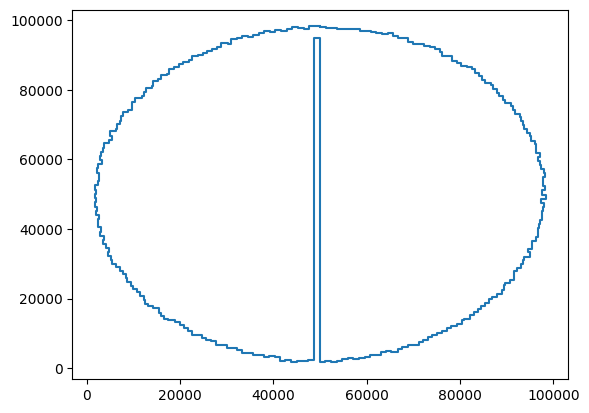

In [56]:
import matplotlib.pyplot as plt

with open(file="input.txt") as file:
    input = [line.rstrip() for line in file]

    coordinates = [
        (int(inp.split(",")[0]), int(inp.split(",")[1])) for inp in input
    ]

    Y = [
        int(inp.split(",")[0]) for inp in input
    ]  
    X = [
        int(inp.split(",")[1]) for inp in input
    ] 

    plt.plot(X, Y)
    plt.show()


Looks like an "irregular" enclosed pie with a thin slice cut off from the middle!

And also, because the circle is an **enclosed** one, all the tiles _inside_ the circle are green. So what we need to do is to find the rectangle that could be drawn across the perimiter of the circle.

**So, how does the raycasting principle apply here?**

When we did the first part, we could still create a rectangle that has two vertices beyond the circle, as demonstrated below in green.

![img](./input_vis.png)

But in part 2, we can't consider such rectangles. We need to eliminate the likes of vertices that are beyond the area of the circle. To eliminate this, we need to consider the circle as the polygon and each vertex as the point for raycasting.